<a href="https://colab.research.google.com/github/yadavrishi34/Machine_Learning_Repository/blob/master/project_15_Auto_MPG_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto MPG Data Set

Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".


"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)



Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

http://mlr.cs.umass.edu/ml/datasets/Auto+MPG

http://mlr.cs.umass.edu/ml/machine-learning-databases/auto-mpg/

# Table of Contents

 Problem Definition
    
   *  Project Overview
   *  Problem Statement


 Dataset Analysis
 
  * Importing Python libraries
  
  * Importing the data
  
  * Data Description and Exploratory Visualisations
  
  * Overview
  
  * Missing Value
  
  * Statistics Value
  
  * Numerical features overview
  
  * Feature distribution by target attribute
  
  * Target Variable: Attrition
  
  * Correlation

  * Data Visulisation

  * Data Comparing on Graph
  
  * Complet EDA  


conclusion Remarks

* 4 cylinder has better mileage performance than other and most manufactured one.


* 8 cylinder engines have low mileage count... ofcourse they focus more on pickup( fast cars).


* 5 cylinder, performance wise, competes none neither 4 cylinder nor 6 cylinder.


* Displacement, weight, horsepower are inversely related to mileage.


* More horsepower means low mileage.


* Year on Year Manufacturers have focussed on increasing the mileage of the engines.


* Cars manufactured in Japan majorly focuses more on mileage.



In [ ]:
#get acess google drive data into google colab

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("/content/carmpg.csv")

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52,2130,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84,2295,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79,2625,18.6,82,1,"""ford ranger"""


We have 9 columns


mpg is the target variable that we want to predict.


So we have 8 features to predict from data set.

According to the dataset description we have:

* 5 continuous features: mpt (the target), displacement, horsepower, weight,  acceleration


* 4 categorical features: cylinders and model_year (ordinal), origin and name

In [ ]:
# Lets split variable 'car name' as 'brand name' and 'model name'
df['brand name'], df['model name'] = df['car name'].str.split(' ',1).str

In [ ]:
# Lets group and view the data
df.groupby(['brand name']).sum().head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
brand name,,,,,,,
"""amc",510.9,178,7005.0,91858,427.4,2080,28
"""audi",187.0,30,783.0,17893,111.6,530,14
"""bmw",47.5,8,242.0,4834,25.3,147,4
"""buick",326.1,110,4640.0,60407,249.9,1294,17
"""cadillac",39.5,16,700.0,8280,29.5,155,2


In [ ]:
# what is 'hi'? Is it a wrong split and where is it located in the data file. 
## lets find out....Seriously this is how i learn python .i'm crazy!
df['brand name'].str.contains('hi').head()

0    False
1    False
2    False
3    False
4    False
Name: brand name, dtype: bool

In [ ]:
# Hmm no, the split is correct! lets continue...
df.iloc[28,:]

mpg                      9
cylinders                8
displacement           304
horsepower             193
weight                4732
acceleration          18.5
model year              70
origin                   1
car name        "hi 1200d"
brand name             "hi
model name          1200d"
Name: 28, dtype: object

In [ ]:
# Correct brand name 
df['brand name'] = df['brand name'].str.replace('chevroelt|chevrolet|chevy','chevrolet')
df['brand name'] = df['brand name'].str.replace('maxda|mazda','mazda')
df['brand name'] = df['brand name'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
df['brand name'] = df['brand name'].str.replace('toyota|toyouta','toyota')
df['brand name'] = df['brand name'].str.replace('vokswagen|volkswagen|vw','volkswagen')

df.groupby(['brand name']).sum().head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
brand name,,,,,,,,
"""amc",510.9,178,7005.0,3201.469388,91858,427.4,2080,28
"""audi",187.0,30,783.0,607.000000,17893,111.6,530,14
"""bmw",47.5,8,242.0,223.000000,4834,25.3,147,4
"""buick",326.1,110,4640.0,2319.000000,60407,249.9,1294,17
"""cadillac",39.5,16,700.0,305.000000,8280,29.5,155,2


In [ ]:
# check horsepower
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
brand name       object
model name       object
dtype: object

In [ ]:
# lest check dolumns & null value & data type after nan value  
for col in df.columns:
   print("Column data type :",df[col].dtype," column name :",col," Null values: ",df[col].isnull().sum())

Column data type : float64  column name : mpg  Null values:  0
Column data type : int64  column name : cylinders  Null values:  0
Column data type : float64  column name : displacement  Null values:  0
Column data type : float64  column name : horsepower  Null values:  0
Column data type : int64  column name : weight  Null values:  0
Column data type : float64  column name : acceleration  Null values:  0
Column data type : int64  column name : model year  Null values:  0
Column data type : int64  column name : origin  Null values:  0
Column data type : object  column name : car name  Null values:  0
Column data type : object  column name : brand name  Null values:  0
Column data type : object  column name : model name  Null values:  2


In [ ]:
# Convert horsepower from Object to numeric
#df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
#df.head()

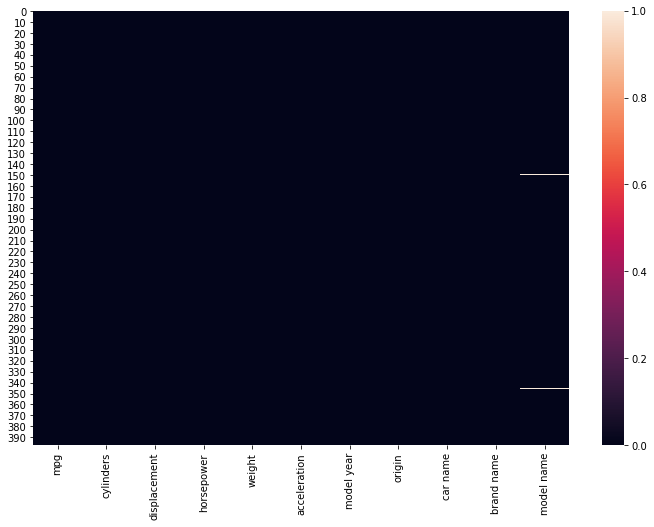

In [ ]:
fig=plt.subplots(figsize=(12,8))

sns.heatmap(df.isnull())

In [ ]:
df.shape

(398, 11)

# Exploratory data analysis
Exploratory Data Analysis – Exploratory analysis is the first step of data analysis. Here we get familiar with data, ask questions, visualize the data in a number of forms, look for the relationships between the variables, look for the outliers, patterns and trends in data set.

In [ ]:
#Lets check the corrrelation matrix
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


In [ ]:
#Lets describe the dataset
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
from tabulate import tabulate
stats_ = df.describe().T.drop(["count", "25%", "75%"], axis=1)
stats_ = pd.concat([stats_, df.skew()], axis=1)
stats_.columns = ["mean", "std", "min", "median", "max", "skew" ]
cols = ["mean", "median", "std", "skew", "min", "max"]
stats_ = stats_[cols]
print(tabulate(stats_, headers="keys", floatfmt=".1f"))

                mean    median    std    skew     min     max
------------  ------  --------  -----  ------  ------  ------
mpg             23.5      23.0    7.8     0.5     9.0    46.6
cylinders        5.5       4.0    1.7     0.5     3.0     8.0
displacement   193.4     148.5  104.3     0.7    68.0   455.0
horsepower     104.5      95.0   38.2     1.1    46.0   230.0
weight        2970.4    2803.5  846.8     0.5  1613.0  5140.0
acceleration    15.6      15.5    2.8     0.3     8.0    24.8
model year      76.0      76.0    3.7     0.0    70.0    82.0


# Data cleaning and preprocessing

Skewness: 0.457066
Kurtosis: -0.510781


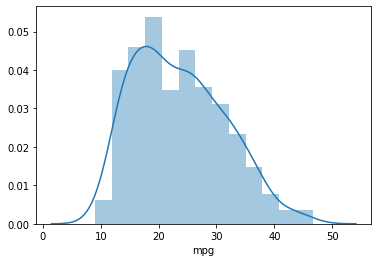

In [ ]:
# Univariate Analysis
# plot distribution plot to view the distribution of target variable
sns.distplot(df['mpg'])
# Skewness and kurtosis
print("Skewness: %f" %df['mpg'].skew())
print("Kurtosis: %f" %df['mpg'].kurt())

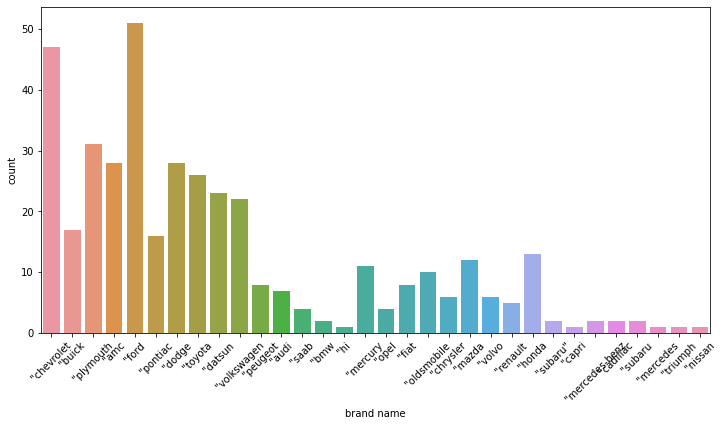

In [ ]:
# Counts of each brands
plt.figure(figsize=(12,6))
sns.countplot(x = "brand name", data=df)
t = plt.xticks(rotation=45)

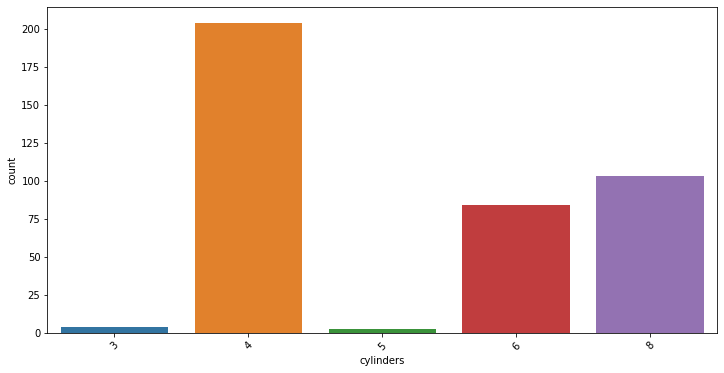

In [ ]:
# Counts of each brands
plt.figure(figsize=(12,6))
sns.countplot(x = "cylinders", data=df)
t = plt.xticks(rotation=45)

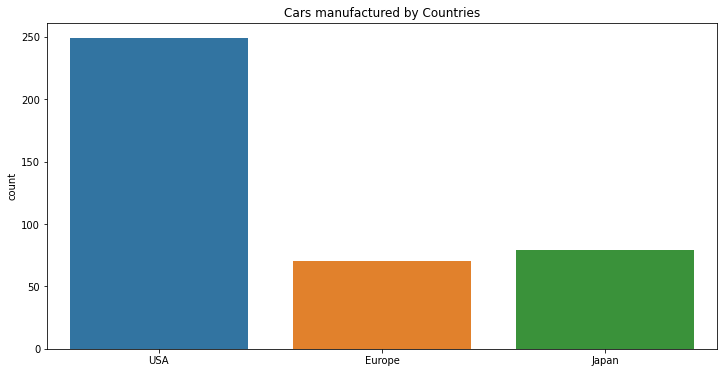

In [ ]:
# Car Counts Manufactured by country
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(x = df.origin.values, data=df)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'USA'
labels[1] = 'Europe'
labels[2] = 'Japan'
ax.set_xticklabels(labels)
ax.set_title("Cars manufactured by Countries")
plt.show()

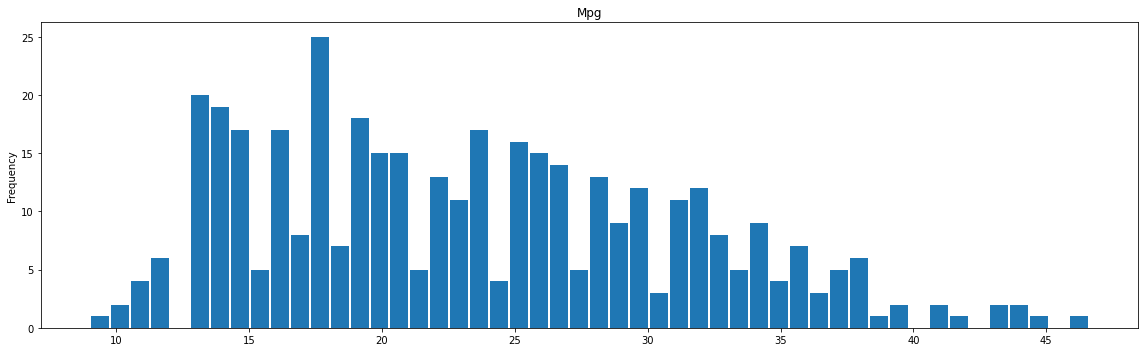

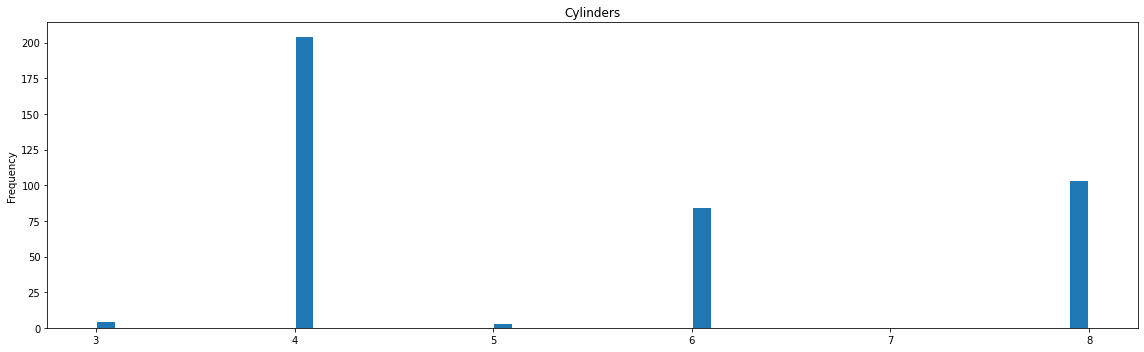

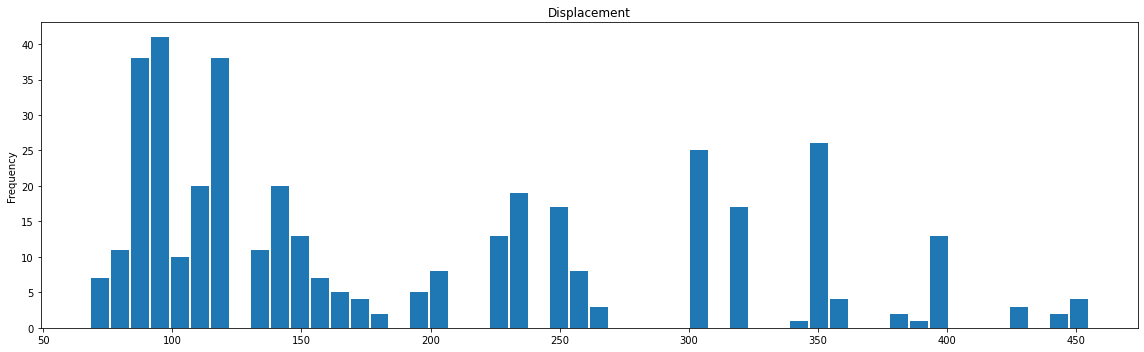

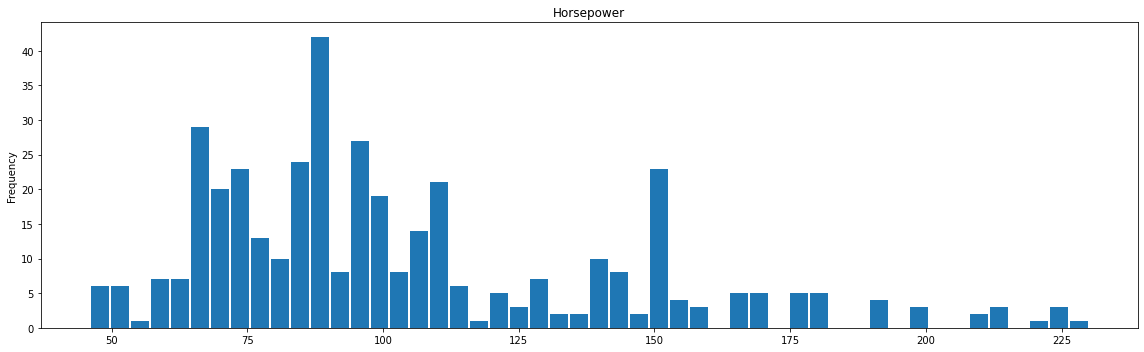

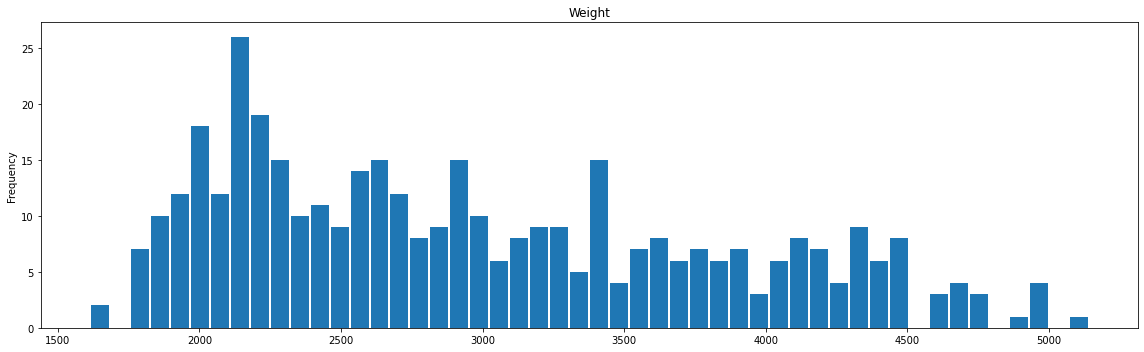

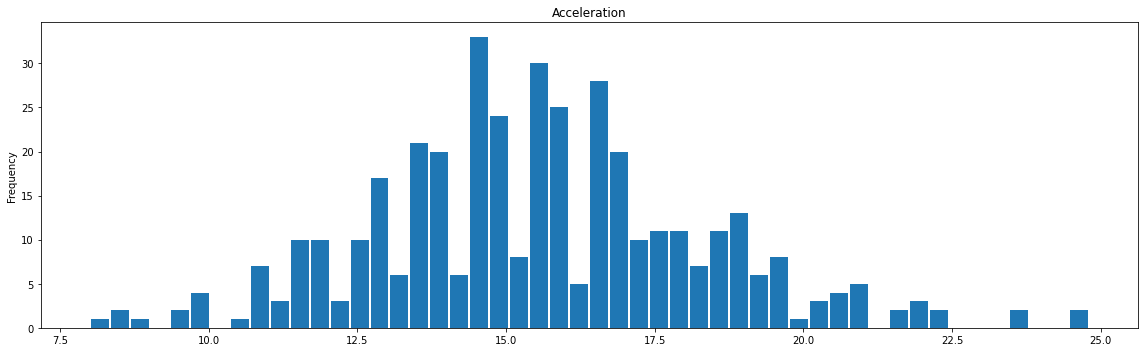

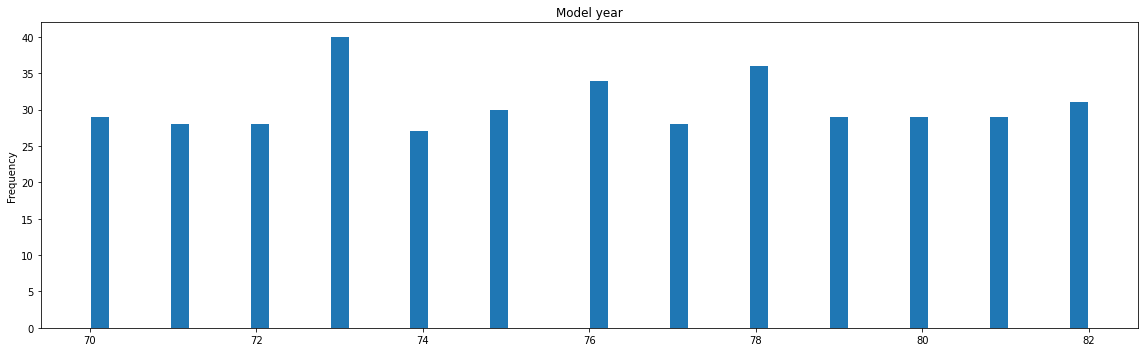

In [ ]:
for feature in df.select_dtypes("number").columns:
    if feature == "model_year":
        continue
    plt.figure(figsize=(16,5))
    #sns.distplot(df[feature], hist_kws={"rwidth": 0.9})
    #plt.xlim(df[feature].min(), df[feature].max())
    df[feature].plot(kind="hist", rwidth=0.9, bins=50)
    plt.title(f"{feature.capitalize()}")
    plt.tight_layout()
    plt.show()

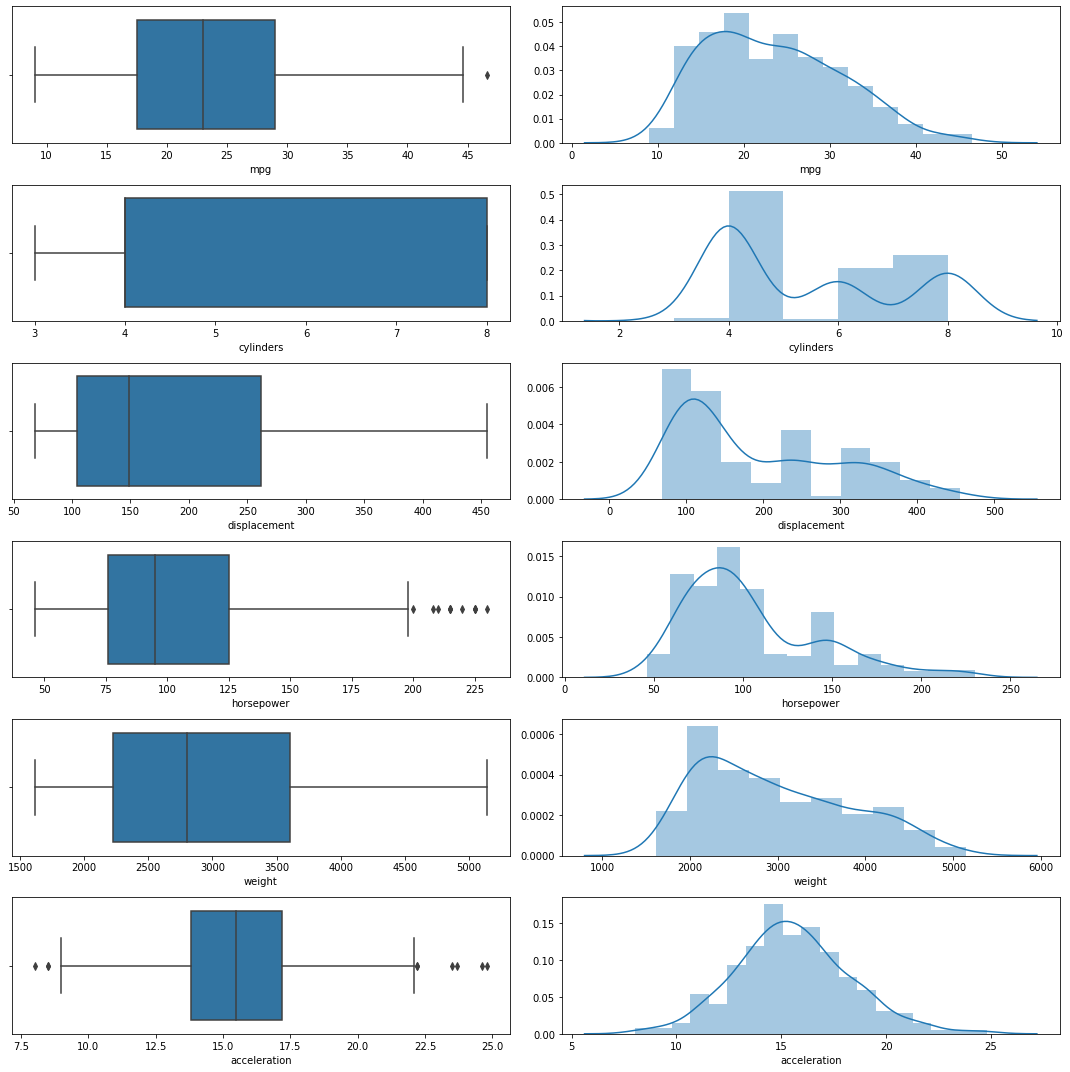

In [ ]:
# Exploring the range and distribution of numerical Variables 

fig, ax = plt.subplots(6, 2, figsize = (15, 15))
sns.boxplot(x= df["mpg"], ax = ax[0,0])
sns.distplot(df['mpg'], ax = ax[0,1])

sns.boxplot(x= df["cylinders"], ax = ax[1,0])
sns.distplot(df['cylinders'], ax = ax[1,1])

sns.boxplot(x= df["displacement"], ax = ax[2,0])
sns.distplot(df['displacement'], ax = ax[2,1])

sns.boxplot(x= df["horsepower"], ax = ax[3,0])
sns.distplot(df['horsepower'], ax = ax[3,1])

sns.boxplot(x= df["weight"], ax = ax[4,0])
sns.distplot(df['weight'], ax = ax[4,1])

sns.boxplot(x= df["acceleration"], ax = ax[5,0])
sns.distplot(df['acceleration'], ax = ax[5,1])

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

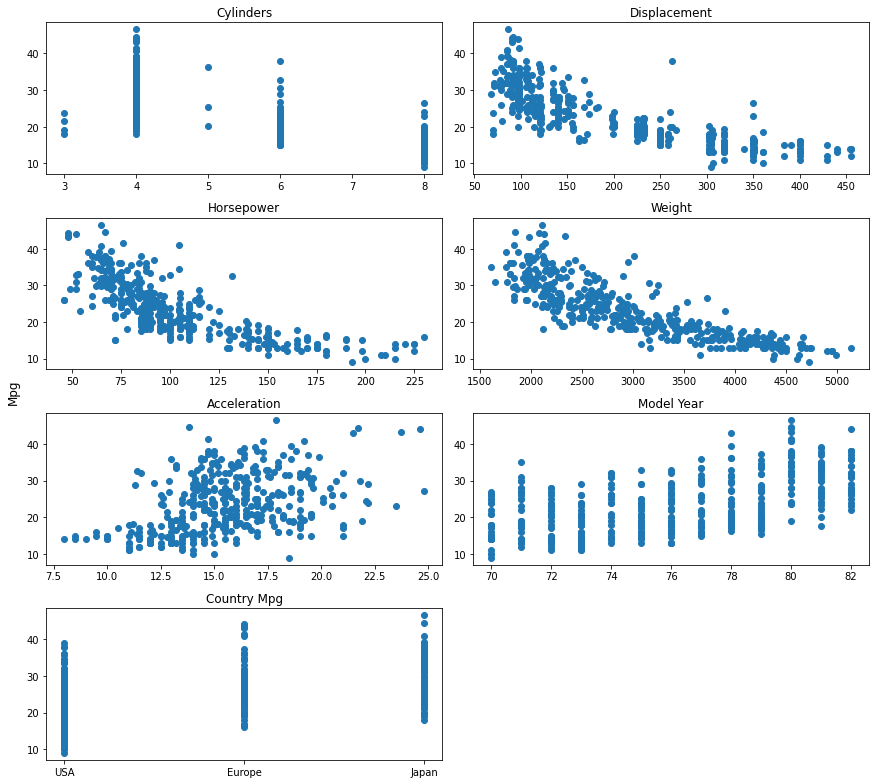

In [ ]:
# Bivariate Analysis
# Plot Numerical Variables 
plt.figure(1)
f,axarr = plt.subplots(4,2, figsize=(12,11))
mpgval = df.mpg.values

axarr[0,0].scatter(df.cylinders.values, mpgval)
axarr[0,0].set_title('Cylinders')

axarr[0,1].scatter(df.displacement.values, mpgval)
axarr[0,1].set_title('Displacement')

axarr[1,0].scatter(df.horsepower.values, mpgval)
axarr[1,0].set_title('Horsepower')

axarr[1,1].scatter(df.weight.values, mpgval)
axarr[1,1].set_title('Weight')

axarr[2,0].scatter(df.acceleration.values, mpgval)
axarr[2,0].set_title('Acceleration')

axarr[2,1].scatter(df["model year"].values, mpgval)
axarr[2,1].set_title('Model Year')

axarr[3,0].scatter(df.origin.values, mpgval)
axarr[3,0].set_title('Country Mpg')
# Rename x axis label as USA, Europe and Japan
axarr[3,0].set_xticks([1,2,3])
axarr[3,0].set_xticklabels(["USA","Europe","Japan"])

# Remove the blank plot from the subplots
axarr[3,1].axis("off")

f.text(-0.01, 0.5, 'Mpg', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

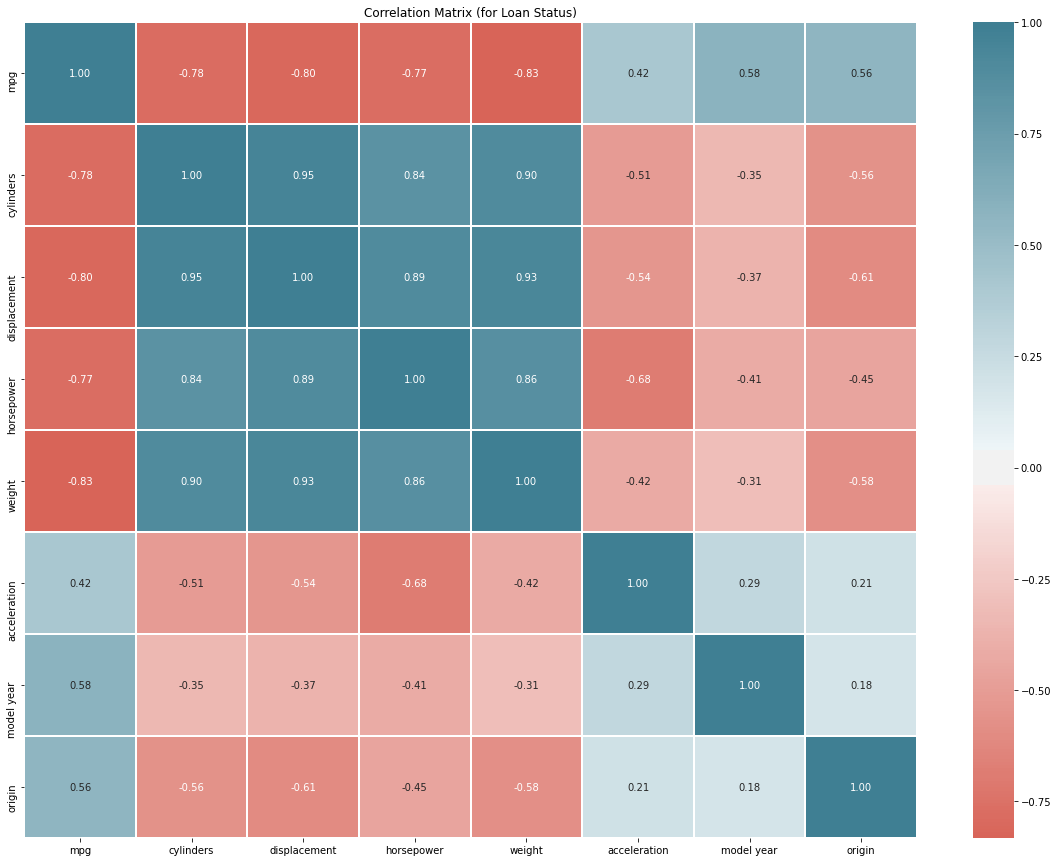

In [ ]:
# Correlation Matrix
fig_df=(20,15)
fig,ax=plt.subplots(figsize=fig_df)
cmap=sns.diverging_palette(h_neg=15,h_pos=220,as_cmap=True)

sns.heatmap(df.corr(),center=0,cmap=cmap,linewidths=1,annot=True,fmt='.2f',ax=ax);
plt.title('Correlation Matrix (for Loan Status)')

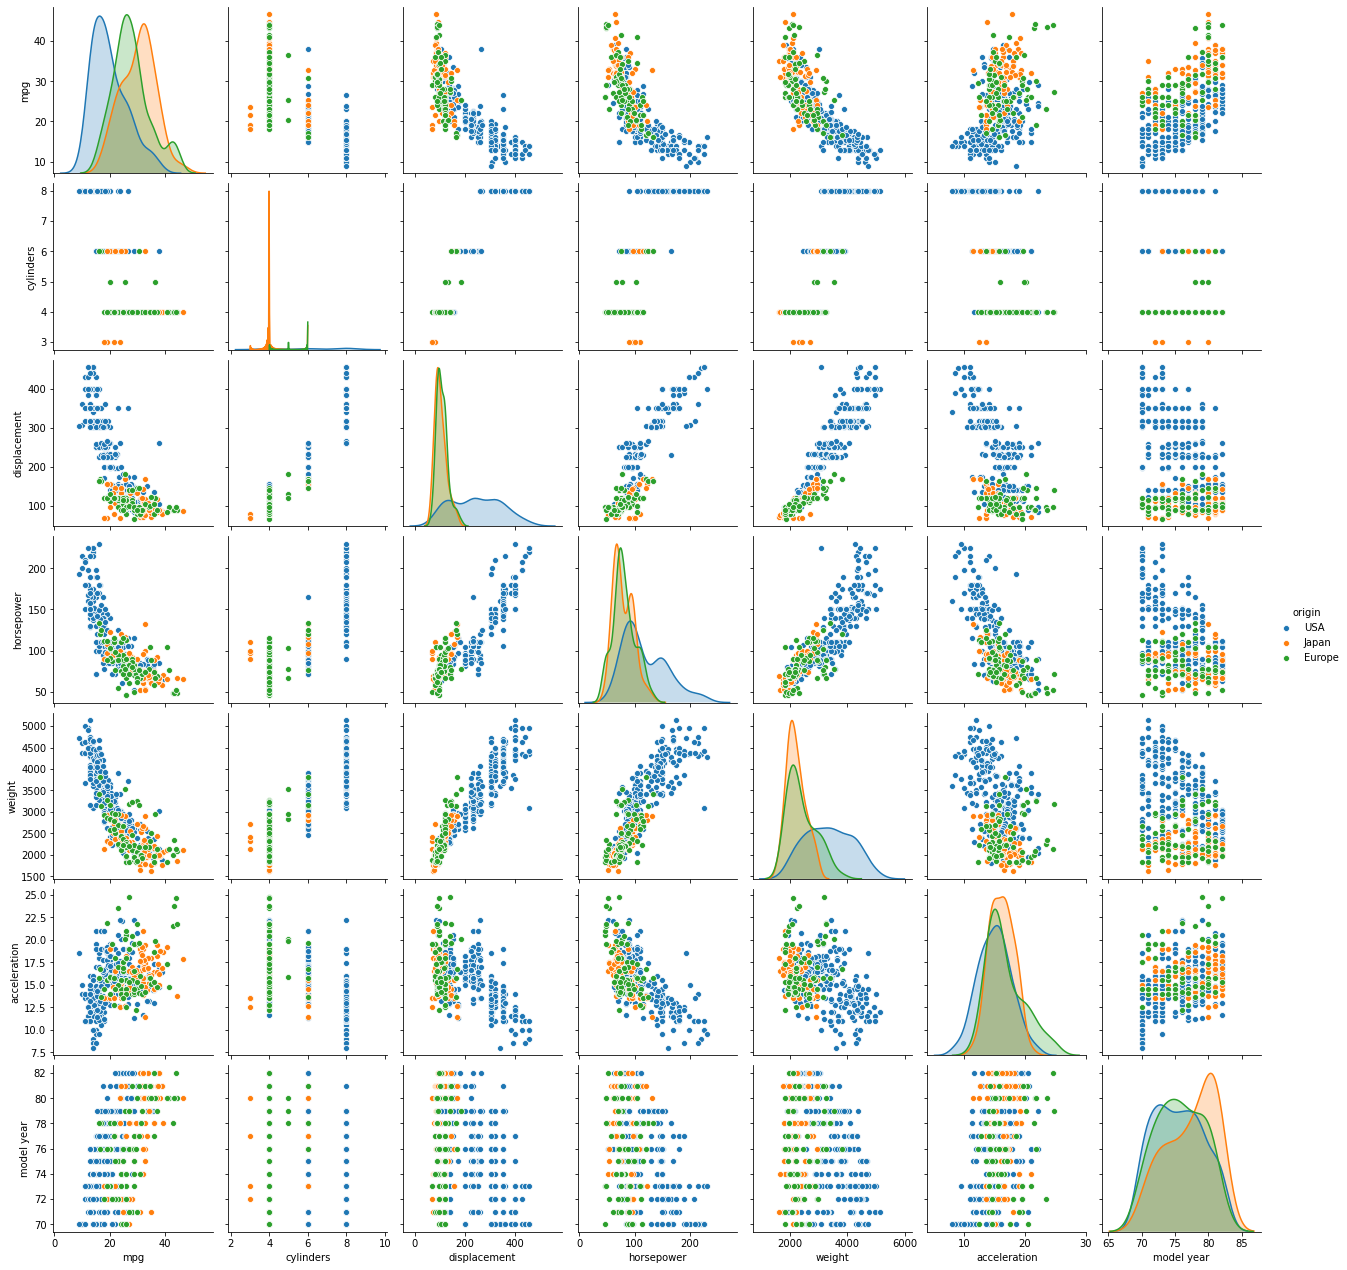

In [ ]:
# Car Manufactured by Countries (USA,Europe,Japan) and multivariate analysis
valtoreplace = {1:'USA', 2:'Europe', 3:'Japan'}
df['origin'] = df['origin'].map(valtoreplace)
sns.pairplot(df, hue="origin")

# conclusion

As pwer above EDA find coclusin:

* 4 cylinder has better mileage performance than other and most manufactured one.


* 8 cylinder engines have low mileage count... ofcourse they focus more on pickup( fast cars).


* 5 cylinder, performance wise, competes none neither 4 cylinder nor 6 cylinder.


* Displacement, weight, horsepower are inversely related to mileage.


* More horsepower means low mileage.


* Year on Year Manufacturers have focussed on increasing the mileage of the engines.


* Cars manufactured in Japan majorly focuses more on mileage.